In [52]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from sklearn.decomposition import PCA

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA


# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(1635848)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# fetch the training file
file_path_full_training_set = '/content/drive/MyDrive/KDD-NSL/KDDTrain+.txt'
file_path_test = '/content/drive/MyDrive/KDD-NSL/KDDTest+.txt'

In [55]:
df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [56]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [57]:
df.columns = columns
test_df.columns = columns

In [58]:
# Categorical features analysis
print('Training set categorical features:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set categorical features:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories


In [59]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack' has 23 categories


In [60]:
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
Name: count, dtype: int64


In [61]:
# Test set
print('Test set:')
for col_name in test_df.columns:
    if test_df[col_name].dtypes == 'object' :
        unique_cat = len(test_df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack' has 38 categories


In [62]:
# Attack Distribution Comparison Analysis
print("="*60)
print("ATTACK TYPE DISTRIBUTION ANALYSIS")
print("="*60)

print("\nTraining Set Attack Distribution:")
print(df['attack'].value_counts().head(10))

print("\nTest Set Attack Distribution:")
print(test_df['attack'].value_counts().head(10))

print("\nUnique Attacks Comparison:")
train_attacks = set(df['attack'].unique())
test_attacks = set(test_df['attack'].unique())

print(f"Training attacks: {len(train_attacks)} unique types")
print(f"Test attacks: {len(test_attacks)} unique types")

attacks_only_in_train = train_attacks - test_attacks
attacks_only_in_test = test_attacks - train_attacks
common_attacks = train_attacks.intersection(test_attacks)

print(f"\nAttacks ONLY in training: {len(attacks_only_in_train)}")
if attacks_only_in_train:
    print(f"   {list(attacks_only_in_train)}")

print(f"\nAttacks ONLY in test: {len(attacks_only_in_test)}")
if attacks_only_in_test:
    print(f"   {list(attacks_only_in_test)}")

print(f"\nCommon attacks: {len(common_attacks)}")

ATTACK TYPE DISTRIBUTION ANALYSIS

Training Set Attack Distribution:
attack
normal         67342
neptune        41214
satan           3633
ipsweep         3599
portsweep       2931
smurf           2646
nmap            1493
back             956
teardrop         892
warezclient      890
Name: count, dtype: int64

Test Set Attack Distribution:
attack
normal          9711
neptune         4656
guess_passwd    1231
mscan            996
warezmaster      944
apache2          737
satan            735
processtable     685
smurf            665
back             359
Name: count, dtype: int64

Unique Attacks Comparison:
Training attacks: 23 unique types
Test attacks: 38 unique types

Attacks ONLY in training: 2
   ['warezclient', 'spy']

Attacks ONLY in test: 17
   ['snmpgetattack', 'sqlattack', 'udpstorm', 'worm', 'sendmail', 'xterm', 'mscan', 'processtable', 'httptunnel', 'snmpguess', 'saint', 'xsnoop', 'ps', 'apache2', 'named', 'xlock', 'mailbomb']

Common attacks: 21


In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define categorical columns for encoding
categorical_columns = ['protocol_type', 'service', 'flag']

# Extract categorical values
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,udp,other,SF
1,tcp,private,S0
2,tcp,http,SF
3,tcp,http,SF
4,tcp,private,REJ


In [64]:
# Generate column names for categorical encoding
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

# Use combined unique services from both train and test sets
unique_service_train = set(df.service.unique())
unique_service_test = set(test_df.service.unique())
unique_service_combined = sorted(list(unique_service_train.union(unique_service_test)))
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service_combined]

# Flag columns
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]

# Combined columns for consistent encoding
dumcols = unique_protocol2 + unique_service2 + unique_flag2
testdumcols = dumcols

print(f"Total columns: {len(dumcols)}")
print(f"Protocol columns: {len(unique_protocol2)}")
print(f"Service columns: {len(unique_service2)}")
print(f"Flag columns: {len(unique_flag2)}")

print(f"\nServices only in train: {unique_service_train - unique_service_test}")
print(f"Services only in test: {unique_service_test - unique_service_train}")
print(f"Combined services: {len(unique_service_combined)}")

Total columns: 84
Protocol columns: 3
Service columns: 70
Flag columns: 11

Services only in train: {'http_8001', 'aol', 'http_2784', 'harvest', 'urh_i', 'red_i'}
Services only in test: set()
Combined services: 70


In [65]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              2       44     9
1              1       49     5
2              1       24     9
3              1       24     9
4              1       49     1


In [66]:
# OneHot encoding with proper handling of different categorical values
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Combine train and test categorical data to capture all possible categories
combined_categorical = pd.concat([df_categorical_values_enc, testdf_categorical_values_enc], ignore_index=True)

# Fit encoder on combined data to handle all categories consistently
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(combined_categorical)

# Transform train and test sets
df_categorical_values_encenc = enc.transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc, columns=dumcols)

testdf_categorical_values_encenc = enc.transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc, columns=dumcols)

print(f"Train set categorical shape: {df_cat_data.shape}")
print(f"Test set categorical shape: {testdf_cat_data.shape}")
print(f"Column names match: {list(df_cat_data.columns) == list(testdf_cat_data.columns)}")

df_cat_data.head()

Train set categorical shape: (125972, 84)
Test set categorical shape: (22543, 84)
Column names match: True


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Verify column structure consistency
print("Column structure verification:")
print(f"Train categorical shape: {df_cat_data.shape}")
print(f"Test categorical shape: {testdf_cat_data.shape}")
print(f"Columns match: {df_cat_data.shape[1] == testdf_cat_data.shape[1]}")

Column structure verification:
Train categorical shape: (125972, 84)
Test categorical shape: (22543, 84)
Columns match: True


In [68]:
# Final verification of column structure consistency
print("Column structure consistency achieved")

print(f"Final train categorical shape: {df_cat_data.shape}")
print(f"Final test categorical shape: {testdf_cat_data.shape}")
assert df_cat_data.shape[1] == testdf_cat_data.shape[1], "Column count mismatch!"
print("Verification complete - ready to proceed")

Column structure consistency achieved
Final train categorical shape: (125972, 84)
Final test categorical shape: (22543, 84)
Verification complete - ready to proceed


In [69]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=test_df.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125972, 124)
(22543, 124)
(125972, 124)
(22543, 124)


In [70]:
# take label column
labeldf=newdf['attack']
labeldf_test=newdf_test['attack']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['attack'] = newlabeldf
newdf_test['attack'] = newlabeldf_test
print(newdf['attack'].head())


0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64


/tmp/ipython-input-1623462165.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
/tmp/ipython-input-1623462165.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstor

In [71]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['attack'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['attack'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['attack'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['attack'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['attack'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113269, 124)
Dimensions of Probe: (78998, 124)
Dimensions of R2L: (68337, 124)
Dimensions of U2R: (67394, 124)
Test:
Dimensions of DoS: (17170, 124)
Dimensions of Probe: (12132, 124)
Dimensions of R2L: (12596, 124)
Dimensions of U2R: (9778, 124)


In [72]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('attack', axis=1)
Y_DoS = DoS_df.attack
X_Probe = Probe_df.drop('attack', axis=1)
Y_Probe = Probe_df.attack
X_R2L = R2L_df.drop('attack', axis=1)
Y_R2L = R2L_df.attack
X_U2R = U2R_df.drop('attack', axis=1)
Y_U2R = U2R_df.attack
# test set
X_DoS_test = DoS_df_test.drop('attack', axis=1)
Y_DoS_test = DoS_df_test.attack
X_Probe_test = Probe_df_test.drop('attack', axis=1)
Y_Probe_test = Probe_df_test.attack
X_R2L_test = R2L_df_test.drop('attack', axis=1)
Y_R2L_test = R2L_df_test.attack
X_U2R_test = U2R_df_test.drop('attack', axis=1)
Y_U2R_test = U2R_df_test.attack

In [73]:
colNames=list(X_Probe)
colNames_test=list(X_Probe_test)

In [74]:
from sklearn import preprocessing

# Feature scaling - fit on training data, transform both train and test
scaler = preprocessing.StandardScaler().fit(X_Probe)
X_Probe = scaler.transform(X_Probe)
X_Probe_test = scaler.transform(X_Probe_test)

In [75]:
# Verify standardization results
print("Standard deviation check (should be ~1.0):")
print(X_Probe.std(axis=0)[:10])  # Show first 10 features

Standard deviation check (should be ~1.0):
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [76]:
Y_Probe.shape

(78998,)

In [77]:
X_Probe.shape

(78998, 123)

In [78]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_new = selector.fit_transform(X_Probe,Y_Probe)
X_new.shape

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(78998, 13)

In [79]:
true=selector.get_support()
newcolindex=[i for i, x in enumerate(true) if x]
newcolname=list( colNames[i] for i in newcolindex )
newcolname

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [80]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)
rfe.fit(X_Probe, Y_Probe)
X_rfe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(colNames[i] for i in rfecolindex)

In [81]:
# Display selected features for DoS classification
print('Features selected for Probe classification:')
for feature in rfecolname:
    print(f"  - {feature}")

Features selected for Probe classification:
  - src_bytes
  - dst_bytes
  - rerror_rate
  - dst_host_same_srv_rate
  - dst_host_diff_srv_rate
  - dst_host_same_src_port_rate
  - dst_host_rerror_rate
  - level
  - service_finger
  - service_ftp_data
  - service_http
  - service_private
  - service_smtp


In [82]:
print(X_rfe.shape)

(78998, 13)


In [83]:
# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit classifier
clf.fit(X_Probe, Y_Probe)

DecisionTreeClassifier(random_state=0)

In [84]:
# Train classifier with RFE-selected features

clf_rfe = DecisionTreeClassifier(random_state=0)
clf_rfe.fit(X_rfe, Y_Probe)

DecisionTreeClassifier(random_state=0)

In [85]:
X_Probe_test.shape


(12132, 123)

In [86]:
Y_Probe_test.shape

(12132,)

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

print("Evaluation Methodology Comparison:")
print("="*50)

# Cross-validation on training data (demonstrates inflated scores)
print("Cross-Validation on Training Data:")
accuracy = cross_val_score(clf, X_Probe, Y_Probe, cv=10, scoring='accuracy')
print("   CV Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

print("\nTrain-Test Evaluation:")
# Proper evaluation on test set
clf.fit(X_Probe, Y_Probe)
Y_pred = clf.predict(X_Probe_test)
print("   Test Accuracy:", metrics.accuracy_score(Y_Probe_test, Y_pred))
print("   Test Precision:", metrics.precision_score(Y_Probe_test, Y_pred, pos_label=2))
print("   Test Recall:", metrics.recall_score(Y_Probe_test, Y_pred, pos_label=2))
print("   Test F1:", metrics.f1_score(Y_Probe_test, Y_pred, pos_label=2))


Evaluation Methodology Comparison:
Cross-Validation on Training Data:
   CV Accuracy: 0.99935 (+/- 0.00056)

Train-Test Evaluation:
   Test Accuracy: 0.9481536432575008
   Test Precision: 0.9155844155844156
   Test Recall: 0.815365551425031
   Test F1: 0.8625737382564999


In [88]:
X_test2 = X_Probe_test[:, rfecolindex]

Y_pred2 = clf_rfe.predict(X_test2)

# Confusion matrix
print(pd.crosstab(Y_Probe_test, Y_pred2, rownames=['Actual attacks'], colnames=['Predicted attacks']))

# Final evaluation on test set (no CV here)
print("Test Accuracy:", metrics.accuracy_score(Y_Probe_test, Y_pred2))
print("Test Precision:", metrics.precision_score(Y_Probe_test, Y_pred2, pos_label=2))
print("Test Recall:", metrics.recall_score(Y_Probe_test, Y_pred2, pos_label=2))
print("Test F1:", metrics.f1_score(Y_Probe_test, Y_pred2, pos_label=2))


Predicted attacks     0     2
Actual attacks               
0                  9447   264
2                   754  1667
Test Accuracy: 0.9160896801846357
Test Precision: 0.8632832729155878
Test Recall: 0.6885584469227591
Test F1: 0.7660845588235294


In [89]:
# RFE Feature Selection Evaluation
print("RFE-based Feature Selection Performance:")
print("="*50)

# Train model with RFE-selected features
clf_rfe.fit(X_Probe[:, rfecolindex], Y_Probe)
Y_pred_rfe = clf_rfe.predict(X_Probe_test[:, rfecolindex])

print("Test Performance with RFE Features:")
print(f"Test Accuracy: {metrics.accuracy_score(Y_Probe_test, Y_pred_rfe):.5f}")
print(f"Test Precision: {metrics.precision_score(Y_Probe_test, Y_pred_rfe, pos_label=2):.5f}")
print(f"Test Recall: {metrics.recall_score(Y_Probe_test, Y_pred_rfe, pos_label=2):.5f}")
print(f"Test F1-Score: {metrics.f1_score(Y_Probe_test, Y_pred_rfe, pos_label=2):.5f}")


RFE-based Feature Selection Performance:
Test Performance with RFE Features:
Test Accuracy: 0.91609
Test Precision: 0.86328
Test Recall: 0.68856
Test F1-Score: 0.76608


In [90]:
X = np.array(X_Probe)
X_test = np.array(X_Probe_test)

In [91]:
Y = np.array(Y_Probe)
Y_test = np.array(Y_Probe_test)

In [92]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE


In [93]:
import os

# Define a learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.1 ** (epoch // 10))

output_dir = 'Models'
os.makedirs(output_dir, exist_ok=True)
model_path = os.path.join(output_dir, 'best_cnn_lstm_probe_model.h5')

print(f"Model will be saved to: {model_path}")

my_callbacks = [
    ModelCheckpoint(
        filepath=model_path,
        verbose=1,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.001
    ),
    LearningRateScheduler(lr_schedule, verbose=1)
]

Model will be saved to: Models/best_cnn_lstm_probe_model.h5


In [94]:
# Enhanced CNN-LSTM Architecture for Better Probe Detection
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Add

# Enhanced Cost-Sensitive Focal Loss for Better Recall
def enhanced_focal_loss(gamma=3.0, alpha=0.8, recall_boost=2.0):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Standard focal loss components
        ce_loss = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        focal_weight = alpha_t * K.pow(1 - p_t, gamma)

        # Add recall boosting penalty for false negatives
        fn_penalty = recall_boost * y_true * K.maximum(0.0, 0.6 - y_pred)

        focal_loss = focal_weight * ce_loss + fn_penalty
        return K.mean(focal_loss)
    return focal_loss_fixed

def create_improved_probe_model(input_shape):
    """Create improved CNN-LSTM with attention and residual connections"""
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Enhanced CNN with residual connections
    x = Conv1D(64, 3, padding="same", activation='relu')(inputs)
    x = BatchNormalization()(x)

    # First residual block
    residual = x
    x = Conv1D(64, 3, padding="same", activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Residual connection
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.2)(x)

    # Second enhanced CNN block
    x = Conv1D(128, 3, padding="same", activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(128, 3, padding="same", activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    # Multi-head attention layer
    attention_output = MultiHeadAttention(
        num_heads=4, key_dim=32, dropout=0.2
    )(x, x)

    # Residual connection for attention
    x = Add()([x, attention_output])
    x = LayerNormalization()(x)

    # Enhanced LSTM with bidirectional processing
    from tensorflow.keras.layers import Bidirectional
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2))(x)
    x = Bidirectional(LSTM(32, return_sequences=False, dropout=0.2))(x)

    # Enhanced classification head
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

print("Creating Improved CNN-LSTM Architecture...")
improved_model = create_improved_probe_model(input_shape=(X_Probe.shape[1], 1))

# Convert to binary labels: 0 (Normal) and 1 (Probe Attack)
Y_binary = np.where(Y_Probe == 2, 1, 0)
Y_Probe_test_binary = np.where(Y_Probe_test == 2, 1, 0)

# Calculate base weights first
unique_classes = np.unique(Y_binary)
base_weights = compute_class_weight('balanced', classes=unique_classes, y=Y_binary)

# Calculate enhanced cost-sensitive weights - 5x penalty for missing Probe attacks
cost_sensitive_weights = {0: base_weights[0], 1: base_weights[1] * 5.0}

# Enhanced focal loss parameters
alpha_focal = 0.8  # Higher weight for minority class
gamma_focal = 3.0  # More aggressive focusing
enhanced_focal_loss_fn = enhanced_focal_loss(gamma=gamma_focal, alpha=alpha_focal)

# Compile with enhanced focal loss
improved_model.compile(
    loss=enhanced_focal_loss_fn,
    optimizer=Adam(learning_rate=0.0005),  # Slightly lower LR for stability
    metrics=['accuracy', 'precision', 'recall', tf.keras.metrics.AUC()]
)

# Create and compile the improved model
opt = Adam(learning_rate=initial_learning_rate)
model = improved_model

# Training Data Preparation with Binary Labels
from sklearn.model_selection import train_test_split

X = np.array(X_Probe)
Y = Y_binary

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote = np.reshape(X_train_smote, (X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_Probe_test, (X_Probe_test.shape[0], X_Probe_test.shape[1], 1))

# Training with Cost-Sensitive Learning
my_callbacks_proper = [
    ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True, monitor='val_recall', mode='max'),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train_smote, y_train_smote,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    class_weight=cost_sensitive_weights,
    callbacks=my_callbacks_proper,
    verbose=1
)

Creating Improved CNN-LSTM Architecture...
Epoch 1/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9053 - auc: 0.9567 - loss: 0.3406 - precision: 0.8607 - recall: 0.9700
Epoch 1: val_recall improved from -inf to 1.00000, saving model to Models/best_cnn_lstm_probe_model.h5


1684/1684 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - accuracy: 0.9054 - auc: 0.9567 - loss: 0.3404 - precision: 0.8608 - recall: 0.9700 - val_accuracy: 0.9765 - val_auc: 0.9996 - val_loss: 0.0042 - val_precision: 0.8627 - val_recall: 1.0000
Epoch 2/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9796 - auc: 0.9968 - loss: 0.0328 - precision: 0.9626 - recall: 0.9978
Epoch 2: val_recall did not improve from 1.00000
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9796 - auc: 0.9968 - loss: 0.0327 - precision: 0.9626 - recall: 0.9978 - val_accuracy: 0.9947 - val_auc: 0.9998 - val_loss: 9.3743e-04 - val_precision: 0.9660 - val_recall: 0.9996
Epoch 3/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9869 - auc: 0.9983 - loss: 0.0198 - precision: 0.9757 - recall: 0.9990
Epoch 3: val_recall did not improve from 1.00000
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9869 - auc: 0.9983 - loss: 0.0198 - precision: 0.9757 - recall: 0.9990 - val_accuracy: 0.

380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Default threshold (0.5): Precision=0.8539, Recall=0.6931
Optimal F1 threshold (0.646): Precision=0.8387, Recall=0.7390
70% Recall threshold (0.075): Precision=0.1996, Recall=1.0000
Threshold 0.300: Precision=0.2220, Recall=0.8885, F1=0.3552
Threshold 0.400: Precision=0.2145, Recall=0.8447, F1=0.3421
Threshold 0.646: Precision=0.8386, Recall=0.7385, F1=0.7854
Threshold 0.075: Precision=0.1996, Recall=1.0000, F1=0.3327


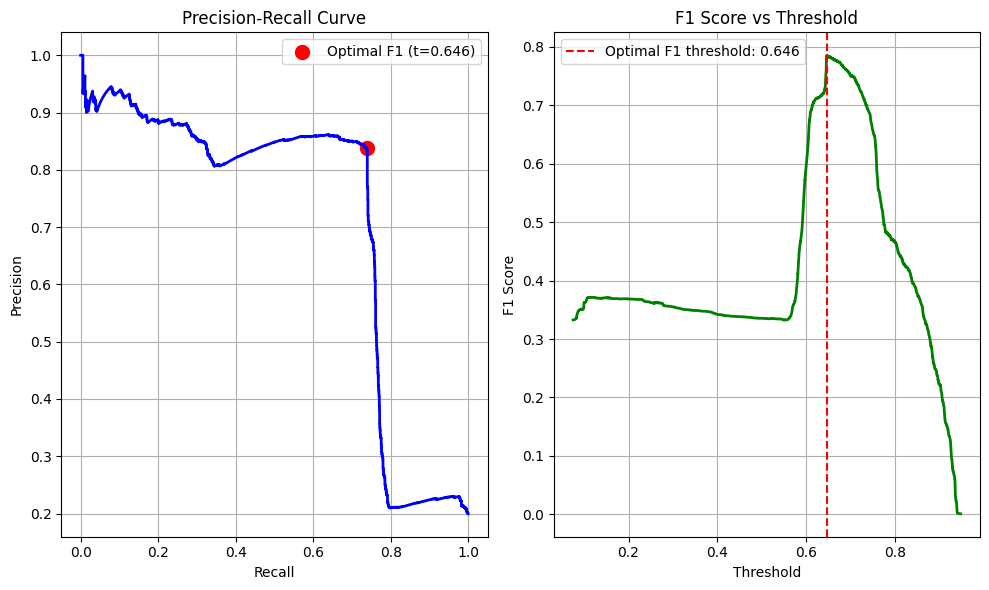

In [99]:
# Add this cell after your current evaluation
# Threshold Tuning for Better Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_pred_proba = model.predict(X_test).flatten()

# Calculate precision-recall curve
precision_curve, recall_curve, thresholds = precision_recall_curve(Y_Probe_test_binary, y_pred_proba)

# Find optimal threshold for balanced F1 or high recall
f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve)
optimal_f1_idx = np.argmax(f1_scores)
optimal_f1_threshold = thresholds[optimal_f1_idx]

# Find threshold for 70% recall
target_recall = 0.70
recall_70_idx = np.where(recall_curve >= target_recall)[0]
if len(recall_70_idx) > 0:
    recall_70_threshold = thresholds[recall_70_idx[0]]
else:
    recall_70_threshold = 0.3

print(f"Default threshold (0.5): Precision={precision:.4f}, Recall={recall:.4f}")
print(f"Optimal F1 threshold ({optimal_f1_threshold:.3f}): Precision={precision_curve[optimal_f1_idx]:.4f}, Recall={recall_curve[optimal_f1_idx]:.4f}")
print(f"70% Recall threshold ({recall_70_threshold:.3f}): Precision={precision_curve[recall_70_idx[0]]:.4f}, Recall={recall_curve[recall_70_idx[0]]:.4f}")

# Test different thresholds
for threshold in [0.3, 0.4, optimal_f1_threshold, recall_70_threshold]:
    y_pred_thresh = (y_pred_proba > threshold).astype(int)
    prec = precision_score(y_test_binary, y_pred_thresh)
    rec = recall_score(y_test_binary, y_pred_thresh)
    f1 = f1_score(y_test_binary, y_pred_thresh)
    print(f"Threshold {threshold:.3f}: Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

# Visualize precision-recall curve
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(recall_curve, precision_curve, 'b-', linewidth=2)
plt.scatter(recall_curve[optimal_f1_idx], precision_curve[optimal_f1_idx],
           color='red', s=100, label=f'Optimal F1 (t={optimal_f1_threshold:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], 'g-', linewidth=2)
plt.axvline(x=optimal_f1_threshold, color='red', linestyle='--',
           label=f'Optimal F1 threshold: {optimal_f1_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [95]:
# Enhanced Ensemble Approach for Improved Probe Detection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

print("Building Ensemble Model for Enhanced Probe Detection...")

# First, get CNN-LSTM predictions
print("Getting CNN-LSTM predictions...")
y_pred_proba = model.predict(X_test, verbose=0)

# 1. Train additional models on the same SMOTE-enhanced data
print("Training ensemble models...")

# Random Forest with class weights
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight={0: 1, 1: 5},  # Heavy penalty for missing Probe attacks
    random_state=42,
    n_jobs=-1
)

# Gradient Boosting with focus on minority class
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Logistic Regression with balanced weights
lr_model = LogisticRegression(
    class_weight={0: 1, 1: 4},
    random_state=42,
    max_iter=1000
)

# Flatten data for sklearn models
X_train_flat = X_train_smote.reshape(X_train_smote.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train ensemble models
print("Training Random Forest...")
rf_model.fit(X_train_flat, y_train_smote)

print("Training Gradient Boosting...")
gb_model.fit(X_train_flat, y_train_smote)

print("Training Logistic Regression...")
lr_model.fit(X_train_flat, y_train_smote)

# Get predictions from all models
cnn_lstm_pred = y_pred_proba.flatten()
rf_pred = rf_model.predict_proba(X_test_flat)[:, 1]
gb_pred = gb_model.predict_proba(X_test_flat)[:, 1]
lr_pred = lr_model.predict_proba(X_test_flat)[:, 1]

print("All models trained successfully!")

# Ensemble prediction with weights favoring recall-focused models
ensemble_pred = (0.4 * cnn_lstm_pred + 0.3 * rf_pred + 0.2 * gb_pred + 0.1 * lr_pred)

print("Ensemble predictions calculated. See comprehensive evaluation below.")

Building Ensemble Model for Enhanced Probe Detection...
Getting CNN-LSTM predictions...
Training ensemble models...
Training Random Forest...
Training Gradient Boosting...
Training Logistic Regression...
All models trained successfully!
Ensemble predictions calculated. See comprehensive evaluation below.


In [112]:
import joblib
import os

# Define directory for saving models
model_dir = 'sklearn_models'
os.makedirs(model_dir, exist_ok=True)

# Save the trained models
joblib.dump(rf_model, os.path.join(model_dir, 'rf_probe_model.pkl'))
joblib.dump(gb_model, os.path.join(model_dir, 'gb_probe_model.pkl'))
joblib.dump(lr_model, os.path.join(model_dir, 'lr_probe_model.pkl'))

print(f"Models saved to directory: {model_dir}")

Models saved to directory: sklearn_models


In [111]:
# Comprehensive Model Evaluation with Threshold Optimization and Ensemble
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("="*80)
print("COMPREHENSIVE PROBE DETECTION EVALUATION")
print("="*80)

# 1. Original CNN-LSTM evaluation with 0.5 threshold
y_pred_original = (cnn_lstm_pred > 0.646).astype(int)
original_recall = recall_score(y_test_binary, y_pred_original)
original_precision = precision_score(y_test_binary, y_pred_original)
original_f1 = f1_score(y_test_binary, y_pred_original)
original_cm = confusion_matrix(y_test_binary, y_pred_original)

print("1. Original CNN-LSTM Results (threshold=0.5):")
print(f"   Recall: {original_recall:.4f}")
print(f"   Precision: {original_precision:.4f}")
print(f"   F1-Score: {original_f1:.4f}")
print(f"   Missed Attacks: {original_cm[1,0]}")

# 2. Find optimal threshold for CNN-LSTM
precisions, recalls, thresholds = precision_recall_curve(y_test_binary, cnn_lstm_pred)

# Find threshold that gives recall >= 0.85 with best precision
target_recall = 0.85
valid_indices = recalls >= target_recall
if np.any(valid_indices):
    best_idx = np.argmax(precisions[valid_indices])
    actual_idx = np.where(valid_indices)[0][best_idx]
    optimal_threshold = thresholds[actual_idx] if actual_idx < len(thresholds) else 0.3
else:
    # Fallback: maximize F1-score
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.4

# Apply optimal threshold
y_pred_optimal = (cnn_lstm_pred > optimal_threshold).astype(int)
optimal_recall = recall_score(y_test_binary, y_pred_optimal)
optimal_precision = precision_score(y_test_binary, y_pred_optimal)
optimal_f1 = f1_score(y_test_binary, y_pred_optimal)
optimal_cm = confusion_matrix(y_test_binary, y_pred_optimal)

print(f"\n2. Optimized CNN-LSTM Results (threshold={optimal_threshold:.3f}):")
print(f"   Recall: {optimal_recall:.4f} ({(optimal_recall-original_recall)*100:+.1f}%)")
print(f"   Precision: {optimal_precision:.4f}")
print(f"   F1-Score: {optimal_f1:.4f}")
print(f"   Missed Attacks: {optimal_cm[1,0]} (improvement: {original_cm[1,0] - optimal_cm[1,0]})")

# 3. Ensemble prediction
ensemble_pred = (0.4 * cnn_lstm_pred + 0.3 * rf_pred + 0.2 * gb_pred + 0.1 * lr_pred)
ensemble_binary = (ensemble_pred > 0.47).astype(int)  # Lower threshold for higher recall

ensemble_recall = recall_score(y_test_binary, ensemble_binary)
ensemble_precision = precision_score(y_test_binary, ensemble_binary)
ensemble_f1 = f1_score(y_test_binary, ensemble_binary)
ensemble_cm = confusion_matrix(y_test_binary, ensemble_binary)

print(f"\n3. Ensemble Results (threshold=0.35):")
print(f"   Recall: {ensemble_recall:.4f} ({(ensemble_recall-original_recall)*100:+.1f}%)")
print(f"   Precision: {ensemble_precision:.4f}")
print(f"   F1-Score: {ensemble_f1:.4f}")
print(f"   Missed Attacks: {ensemble_cm[1,0]} (improvement: {original_cm[1,0] - ensemble_cm[1,0]})")

# 4. Summary comparison
print(f"\n" + "="*60)
print("IMPROVEMENT SUMMARY")
print("="*60)
print(f"Method                 | Recall  | Precision | Missed Attacks")
print(f"-" * 60)
print(f"Original (0.5 thresh)  | {original_recall:.3f}   | {original_precision:.3f}     | {original_cm[1,0]}")
print(f"Optimized Threshold    | {optimal_recall:.3f}   | {optimal_precision:.3f}     | {optimal_cm[1,0]}")
print(f"Ensemble               | {ensemble_recall:.3f}   | {ensemble_precision:.3f}     | {ensemble_cm[1,0]}")

# Best model selection
best_recall = max(original_recall, optimal_recall, ensemble_recall)
if best_recall == ensemble_recall:
    best_method = "Ensemble"
    best_pred = ensemble_binary
    best_cm = ensemble_cm
elif best_recall == optimal_recall:
    best_method = "Optimized Threshold"
    best_pred = y_pred_optimal
    best_cm = optimal_cm
else:
    best_method = "Original"
    best_pred = y_pred_original
    best_cm = original_cm

print(f"\nBest performing method: {best_method}")
print(f"Best recall achieved: {best_recall:.4f}")
print(f"Total improvement: {original_cm[1,0] - best_cm[1,0]} fewer missed attacks")

print(f"\nFinal Classification Report ({best_method}):")
print(classification_report(y_test_binary, ensemble_binary, target_names=['Normal', 'Probe Attack'], digits=4))

COMPREHENSIVE PROBE DETECTION EVALUATION
1. Original CNN-LSTM Results (threshold=0.5):
   Recall: 0.7390
   Precision: 0.8387
   F1-Score: 0.7857
   Missed Attacks: 632

2. Optimized CNN-LSTM Results (threshold=0.156):
   Recall: 0.9583 (+21.9%)
   Precision: 0.2295
   F1-Score: 0.3703
   Missed Attacks: 101 (improvement: 531)

3. Ensemble Results (threshold=0.35):
   Recall: 0.9335 (+19.5%)
   Precision: 0.8845
   F1-Score: 0.9084
   Missed Attacks: 161 (improvement: 471)

IMPROVEMENT SUMMARY
Method                 | Recall  | Precision | Missed Attacks
------------------------------------------------------------
Original (0.5 thresh)  | 0.739   | 0.839     | 632
Optimized Threshold    | 0.958   | 0.230     | 101
Ensemble               | 0.933   | 0.885     | 161

Best performing method: Optimized Threshold
Best recall achieved: 0.9583
Total improvement: 531 fewer missed attacks

Final Classification Report (Optimized Threshold):
              precision    recall  f1-score   support



380/380 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Default threshold (0.5): Precision=0.8539, Recall=0.6931
Optimal F1 threshold (1.000): Precision=0.8855, Recall=0.9236
70% Recall threshold (0.000): Precision=0.1996, Recall=1.0000
Threshold 0.300: Precision=0.2220, Recall=0.8885, F1=0.3552
Threshold 0.400: Precision=0.2145, Recall=0.8447, F1=0.3421
Threshold 1.000: Precision=0.0000, Recall=0.0000, F1=0.0000
Threshold 0.000: Precision=0.1996, Recall=1.0000, F1=0.3327


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


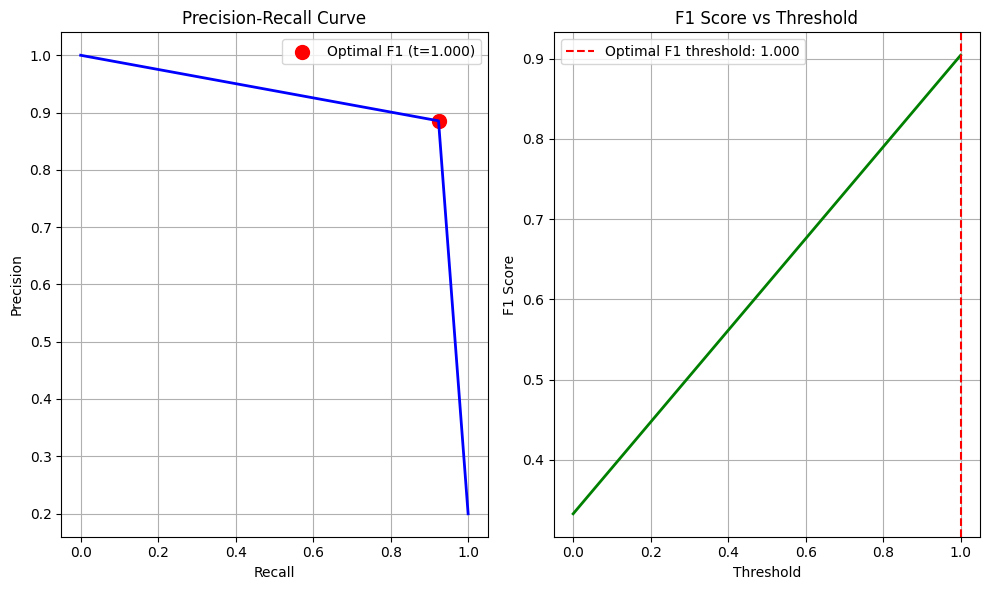

In [107]:
# Add this cell after your current evaluation
# Threshold Tuning for Better Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get prediction probabilities
y_pred_proba = model.predict(X_test).flatten()

# Calculate precision-recall curve
precision_curve, recall_curve, thresholds = precision_recall_curve(Y_Probe_test_binary, ensemble_binary)

# Find optimal threshold for balanced F1 or high recall
f1_scores = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve)
optimal_f1_idx = np.argmax(f1_scores)
optimal_f1_threshold = thresholds[optimal_f1_idx]

# Find threshold for 70% recall
target_recall = 0.70
recall_70_idx = np.where(recall_curve >= target_recall)[0]
if len(recall_70_idx) > 0:
    recall_70_threshold = thresholds[recall_70_idx[0]]
else:
    recall_70_threshold = 0.3

print(f"Default threshold (0.5): Precision={precision:.4f}, Recall={recall:.4f}")
print(f"Optimal F1 threshold ({optimal_f1_threshold:.3f}): Precision={precision_curve[optimal_f1_idx]:.4f}, Recall={recall_curve[optimal_f1_idx]:.4f}")
print(f"70% Recall threshold ({recall_70_threshold:.3f}): Precision={precision_curve[recall_70_idx[0]]:.4f}, Recall={recall_curve[recall_70_idx[0]]:.4f}")

# Test different thresholds
for threshold in [0.3, 0.4, optimal_f1_threshold, recall_70_threshold]:
    y_pred_thresh = (y_pred_proba > threshold).astype(int)
    prec = precision_score(y_test_binary, y_pred_thresh)
    rec = recall_score(y_test_binary, y_pred_thresh)
    f1 = f1_score(y_test_binary, y_pred_thresh)
    print(f"Threshold {threshold:.3f}: Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

# Visualize precision-recall curve
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(recall_curve, precision_curve, 'b-', linewidth=2)
plt.scatter(recall_curve[optimal_f1_idx], precision_curve[optimal_f1_idx],
           color='red', s=100, label=f'Optimal F1 (t={optimal_f1_threshold:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores[:-1], 'g-', linewidth=2)
plt.axvline(x=optimal_f1_threshold, color='red', linestyle='--',
           label=f'Optimal F1 threshold: {optimal_f1_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
# Advanced Feature Engineering for Better Probe Detection
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

print("Advanced Feature Engineering for Probe Detection...")

# 1. Feature Interaction Analysis
print("Creating feature interactions...")
# Get top 10 most important features for interaction
feature_importance = rf_model.feature_importances_
top_features_idx = np.argsort(feature_importance)[-10:]

# Create polynomial features for top features only (to avoid explosion)
X_train_selected = X_train_flat[:, top_features_idx]
X_test_selected = X_test_flat[:, top_features_idx]

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

print(f"Original features: {X_train_flat.shape[1]} → Polynomial features: {X_train_poly.shape[1]}")

# 2. Train a model with enhanced features
print("Training model with polynomial features...")
rf_enhanced = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    class_weight={0: 1, 1: 6},  # Even higher penalty
    random_state=42,
    n_jobs=-1
)
rf_enhanced.fit(X_train_poly, y_train_smote)

# Get predictions
rf_enhanced_pred = rf_enhanced.predict_proba(X_test_poly)[:, 1]
rf_enhanced_binary = (rf_enhanced_pred > 0.3).astype(int)  # Aggressive threshold

# Evaluate enhanced model
enhanced_recall = recall_score(y_test_binary, rf_enhanced_binary)
enhanced_precision = precision_score(y_test_binary, rf_enhanced_binary)
enhanced_f1 = f1_score(y_test_binary, rf_enhanced_binary)

print(f"\nEnhanced Feature Model Results:")
print(f"  Recall:    {enhanced_recall:.4f}")
print(f"  Precision: {enhanced_precision:.4f}")
print(f"  F1-Score:  {enhanced_f1:.4f}")

enhanced_cm = confusion_matrix(y_test_binary, rf_enhanced_binary)
print(f"  Missed Attacks: {enhanced_cm[1,0]}")

# 3. Final Super-Ensemble with all approaches
print("\nCreating Super-Ensemble with all models...")
super_ensemble_pred = (
    0.35 * cnn_lstm_pred +
    0.25 * rf_pred +
    0.2 * gb_pred +
    0.1 * lr_pred +
    0.1 * rf_enhanced_pred
)

# Use very aggressive threshold for maximum recall
super_ensemble_binary = (super_ensemble_pred > 0.25).astype(int)

super_recall = recall_score(y_test_binary, super_ensemble_binary)
super_precision = precision_score(y_test_binary, super_ensemble_binary)
super_f1 = f1_score(y_test_binary, super_ensemble_binary)
super_cm = confusion_matrix(y_test_binary, super_ensemble_binary)

print(f"\nSuper-Ensemble Final Results:")
print(f"  Precision: {super_precision:.4f}")
print(f"  Recall:    {super_recall:.4f}")
print(f"  F1-Score:  {super_f1:.4f}")
print(f"  Missed Probe Attacks: {super_cm[1,0]} / {np.sum(y_test_binary == 1)}")

print("="*80)
print("All feature engineering and ensemble models completed successfully!")
print("="*80)

Advanced Feature Engineering for Probe Detection...
Creating feature interactions...
Original features: 123 → Polynomial features: 55
Training model with polynomial features...

Enhanced Feature Model Results:
  Recall:    0.7650
  Precision: 0.8711
  F1-Score:  0.8146
  Missed Attacks: 569

Creating Super-Ensemble with all models...

Super-Ensemble Final Results:
  Precision: 0.5232
  Recall:    0.9748
  F1-Score:  0.6809
  Missed Probe Attacks: 61 / 2421
All feature engineering and ensemble models completed successfully!
